Dataset: Disney+ TV Shows and Movies   
https://www.kaggle.com/datasets/victorsoeiro/disney-tv-shows-and-movies?select=titles.csv

# Analyzing the movies from Disney+ Dataset

This project fetches the rows whose type is MOVIE from the dataset. It analyzes the number and average runtime of the released movies each year, the number of the movies for each genre, and the number of each age certification.   

I expected that as time passed, the number and average runtime of the released movies each year would grow. Also, Disney is well known for animation, so I thought animation and 'G' movies are the most in number in movies.   

The result shows that the number of released movies each year grows but the average runtime doesn't, and 'G' movies are the most in number in movies, but the animation isn't.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib import style

In [2]:
data = pd.read_csv('titles.csv') #read csv file
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


# Fetch the rows whose type is MOVIE

In [3]:
set_by_movies=data[data['type']=='MOVIE']
set_by_movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


# 1. The number of the released movies each year

### Groupy by release_year

In [4]:
set_by_year=set_by_movies.groupby('release_year').count() #group by release year
set_by_year

,id,title,type,description,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,,,,,,,,,,,,,,
1928,1,1,1,1,1,1,1,1,0,0,0,0,1,1
1932,3,3,3,3,0,3,3,3,0,0,0,0,3,3
1933,3,3,3,3,0,3,3,3,0,0,0,0,3,3
1934,4,4,4,4,0,4,4,4,0,0,0,0,4,4
1935,4,4,4,4,0,4,4,4,0,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,34,34,34,34,26,34,34,34,0,26,26,26,34,32
2019,53,53,53,53,33,53,53,53,0,37,36,36,53,49
2020,79,79,79,78,49,79,79,79,0,60,56,56,76,63


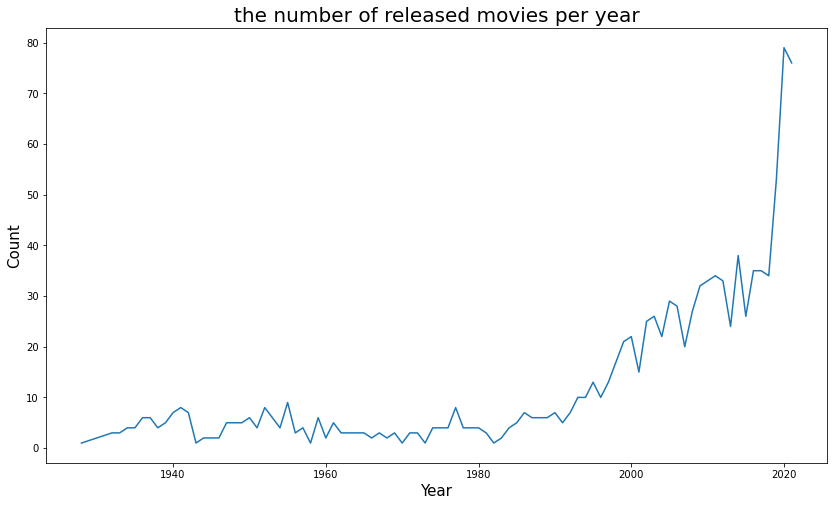

In [5]:
plt.figure(figsize=(14,8))
plt.plot(set_by_year.index[:-1],set_by_year.title[:-1])
plt.title('the number of released movies per year',fontsize=20) 

ax1=plt.gca() 
ax1.set_xlabel('Year',fontsize=15)
ax1.set_ylabel('Count',fontsize=15) 

plt.show()

# 2. The average runtime of released movies each year

In [6]:
set_by_runtime=set_by_movies.groupby('release_year').mean() #group by release year and get mean
set_by_runtime

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,,,,,,
1928,8.000000,NaN,NaN,NaN,10.513000,7.400000
1932,7.666667,NaN,NaN,NaN,5.320000,6.400000
1933,8.000000,NaN,NaN,NaN,5.771333,6.333333
1934,8.500000,NaN,NaN,NaN,7.798500,6.275000
1935,9.000000,NaN,NaN,NaN,6.242750,6.700000
...,...,...,...,...,...,...
2018,79.970588,NaN,6.669231,128458.461538,35.121176,6.868750
2019,65.547170,NaN,6.472222,92009.694444,27.199019,7.104082
2020,65.607595,NaN,6.494643,14518.107143,21.327145,7.265079


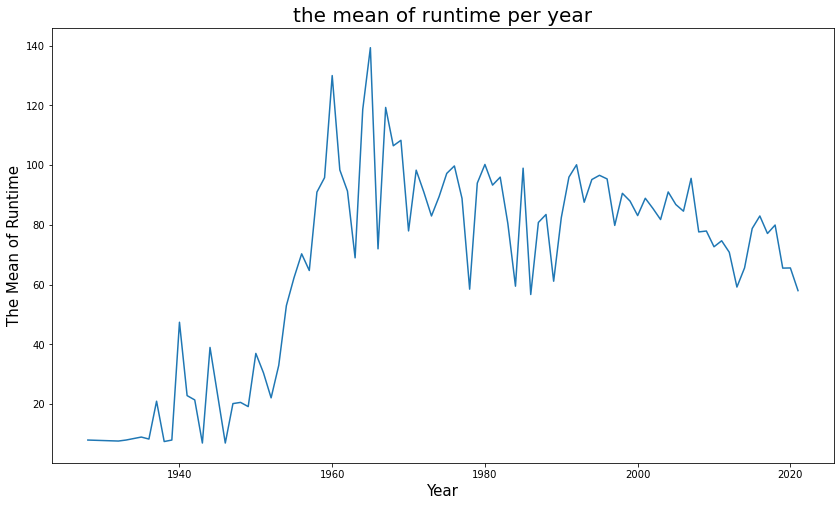

In [7]:
plt.figure(figsize=(14,8))
plt.plot(set_by_runtime.index[:-1],set_by_runtime.runtime[:-1])
plt.title('the mean of runtime per year',fontsize=20)

ax2=plt.gca()
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('The Mean of Runtime',fontsize=15)

plt.show()

# The graph of the mean of runtime and the number of released movies each year

Text(0, 0.5, 'The Mean of Runtime')

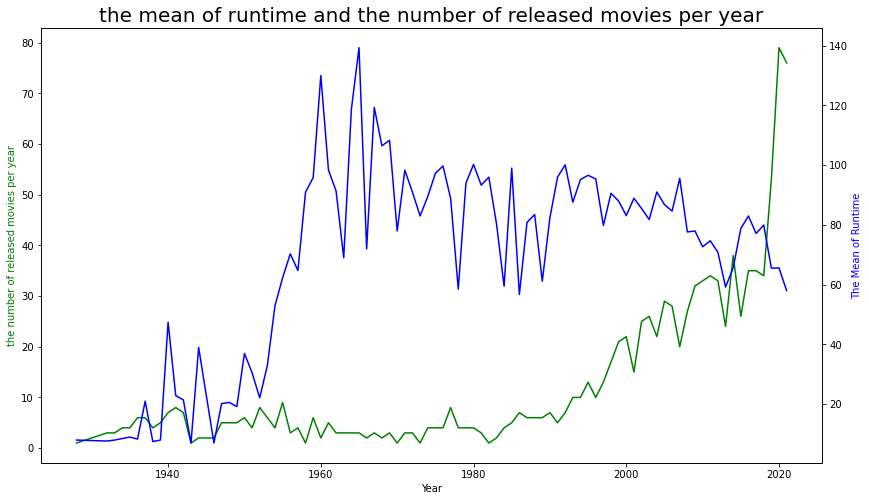

In [8]:
plt.figure(figsize=(14,8))

ax1=plt.gca()
ax2=ax1.twinx()

plt.title('the mean of runtime and the number of released movies per year',fontsize=20)

ax1.plot(set_by_year.index[:-1],set_by_year.title[:-1], color='g')
ax2.plot(set_by_runtime.index[:-1],set_by_runtime.runtime[:-1],'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('the number of released movies per year',color='green')
ax2.set_ylabel('The Mean of Runtime',color='blue')

# 3. the number of the movies for each genre

In [9]:
genre={}

for i in set_by_movies['genres']:
    parse=re.sub('[\[\]\' ]','',i)
    parse=parse.split(',')            
    for j in parse:
        if j == '':
            continue
        if j not in genre:
            genre[j]=0
        genre[j]+=1        

In [10]:
genre

{'animation': 336,
 'family': 542,
 'music': 75,
 'fantasy': 301,
 'romance': 117,
 'thriller': 34,
 'drama': 260,
 'comedy': 472,
 'action': 186,
 'horror': 23,
 'documentation': 233,
 'scifi': 148,
 'western': 16,
 'sport': 54,
 'european': 32,
 'crime': 30,
 'history': 32,
 'war': 5,
 'reality': 3}

In [11]:
genre_count=pd.DataFrame(genre,index=['count'])

In [12]:
genre_count2=genre_count.transpose()
genre_count2.index.name='genres'
genre_count2

,count
genres,
animation,336
family,542
music,75
fantasy,301
romance,117
thriller,34
drama,260
comedy,472
action,186


Text(0.5, 1.0, 'the number of the movies for each genre')

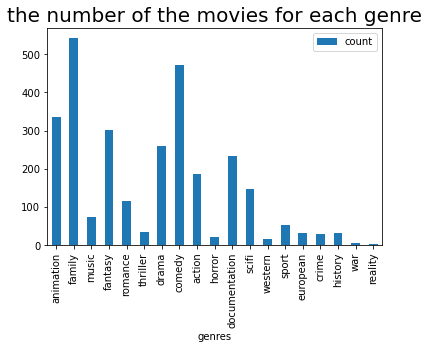

In [13]:
genre_count2.plot(kind='bar')

plt.title('the number of the movies for each genre',fontsize=20)

# 4. The number of each age_certification

In [14]:
set_by_ages=set_by_movies.groupby('age_certification').count()
set_by_ages

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
age_certification,,,,,,,,,,,,,,
G,409,409,409,409,409,409,409,409,0,272,266,266,409,406
PG,354,354,354,354,354,354,354,354,0,295,295,293,354,341
PG-13,99,99,99,99,99,99,99,99,0,88,88,87,99,94


In [15]:
def labels(x,y):
    for i in range(0, len(x)):
        plt.text(i-0.1,y[i]+5,y[i])

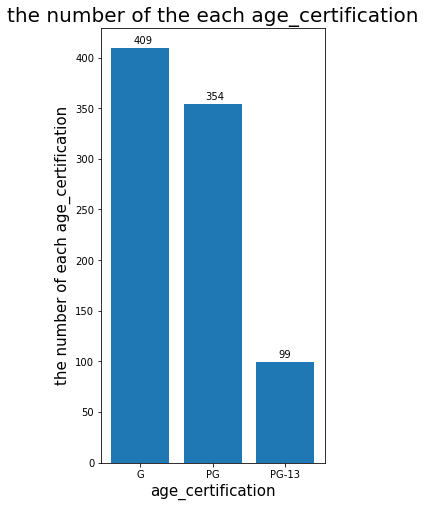

In [16]:
plt.figure(figsize=(4,8))
plt.bar(set_by_ages.index,set_by_ages.id)
plt.title('the number of the each age_certification',fontsize=20)
labels(set_by_ages.index,set_by_ages.id)

ax3=plt.gca()
ax3.set_xlabel('age_certification',fontsize=15)
ax3.set_ylabel('the number of each age_certification',fontsize=15)

plt.show()